In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict 
# the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [ ]:
# First and foremost, this block of code is used to import or 
# load the essential libraries that would be
# would be used in this particular project. 

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# This code is for the use of style
plt.style.use('fivethirtyeight')

In [ ]:
# For this block of quote, the user is intending to get 
#### the stock quote for the company 'Apple Inc.' 
#### by utilizing the stock symbol which is 'AAPL' 
#### from a certain time frame. 

# The time frame is from January 1, 2012 to December 17, 2019.
# The data source is orginally from yahoo.

df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17') 

# This line shows the data retrieved overtime
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,269.399658
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.086151
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,273.757477


Stock Ticker Symbols --> https://www.marketwatch.com/tools/quotes/lookup.asp


In [ ]:
# Furthermore, this code aims to render the number of rows and columns in the data 
# during the desired time frame.

df.shape

(2003, 6)

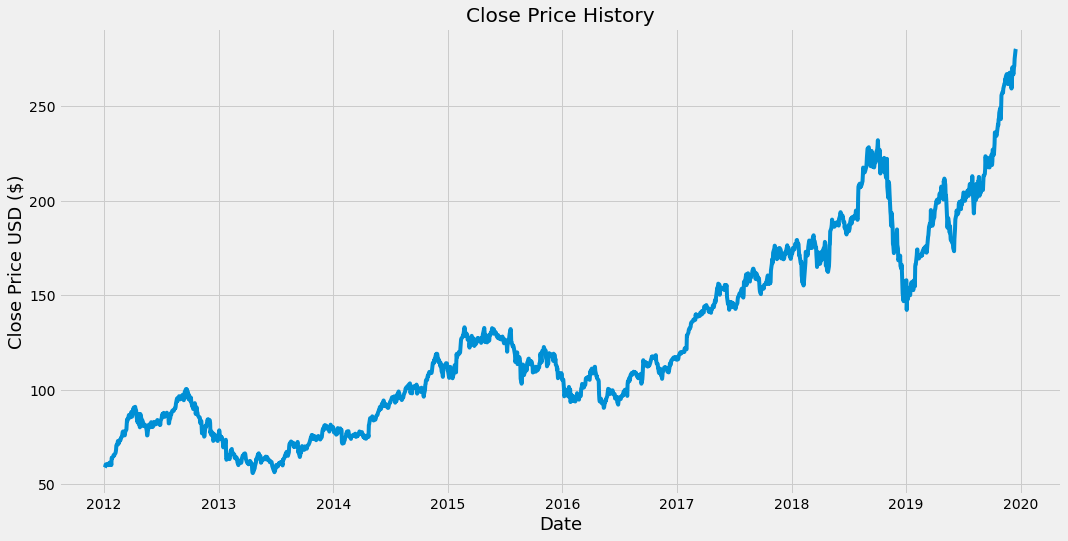

In [ ]:
# This code visualizes the closing price history of the chosen stock
plt.figure(figsize=(16,8))
plt.title('Close Price History')
# can be open or close or high or low
plt.plot(df['Close'])
# This defines the x axis
plt.xlabel('Date',fontsize=18)
# This defines the y axis
plt.ylabel('Close Price USD ($)',fontsize=18)
# Exhibits the data by visualizing it
plt.show()

In [ ]:
# This block of code aims to curate a different data frame specifically for the closing price. 
# Then, it is converted to an array and a variable is created to store the length of the 
# training data set. This training dataset contains about 80 percent of the actual data.

# This part creates a different dataframe with a "Close" column only
data = df.filter(['Close'])
# This part converts the dataframe to a numpy array
dataset = data.values
# This part aims to get / compute the number of rows that should be used to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [ ]:
# Now scale the data set to be values between 0 and 1 inclusive, I do this because it 
# is generally good practice to scale your data before giving it to the neural network.

#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [ ]:
# The aims are the following point

# Manage to make a data set which contains the past 60 day closing price values
# that can be used to forecast the 61st closing price value

# The first column in the "x_train" data set contains value from the
# data set from the index number 0 to index number 59
# In total, this is 60 values total

# The second column in the "y_train" data set 
# It contains the 61st value that is located at index 60 in the first column
# It contains the 62nd value that is located at index 61 of the particular data set for the second value
# The pattern goes on and on 
# It's the same pattern

# Make the scaled training data set using this code 
train_data = scaled_data[0:training_data_len  , : ]
# This code splits the data from the data sets 
# The data sets are x_train and y_train
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
# This part converts the independent train data set "x_train" 
# Dependent train is defined as the affected part by the independent variable/ data set

# The dependent train data set "y_train" is converted to numpy arrays 
# The reason for this is so that it can be used for training the LSTM model 

# This part converts x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# This part aims to reshape the data to be structured into 3-dimensional in the form 
# [number of samples, number of time steps, and number of features]
# LSTM models expect a 3-dimensional data set

# Aims to reshape the data into 3-dimensional since it's the one that is accepted by the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
# This part builds the LSTM model with certain properties

# two LSTM layers with 50 neurons
# two Dense layers 
##### first dense layer -> 25 neurons
##### second dense layer -> 1 neuron


#Build the LSTM network model
model = Sequential()
# first LSTM layer
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
# second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
# first dense layer

# changed
model.add(Dense(units=50))
# second dense layer
model.add(Dense(units=1))

In [ ]:
# This block of code aims to compile the model using the following:
# 1: MSE loss function 
#    MSE stands for mean squared error
# 2: Adam optimizer

# Now, this compiles the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model using the training data sets. Note, fit is another 
# name for train. Batch size is the total number of training examples 
# present in a single batch, and epoch is the number of iterations when 
# an entire data set is passed forward and backward through the neural 
# network.

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1543/1543 [==============================] - 300s 194ms/step - loss: 6.5353e-04
Epoch 2/5
1543/1543 [==============================] - 292s 189ms/step - loss: 2.7299e-04
Epoch 3/5
1543/1543 [==============================] - 289s 187ms/step - loss: 2.1020e-04
Epoch 4/5
1543/1543 [==============================] - 285s 185ms/step - loss: 1.8933e-04
Epoch 5/5
1543/1543 [==============================] - 283s 183ms/step - loss: 1.4930e-04


In [ ]:
# Aims to create a dataset


# Test the data set
test_data = scaled_data[training_data_len - 60: , : ]

# Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
# Get all of the rows from index 1603 to the rest and all of the columns 
# (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
# This converts the independent test data set "x_test"

# Then convert the independent test data set ‘x_test’ to a numpy 
# array so it can be used for testing the LSTM model.

# Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
# Aims
# Reshape the data to be 3-dimensional in a particular form 
# The form consists of the following: 
##### number of samples
##### number of time steps
##### number of features

# It should be done since the LSTM model is expecting a 3-dimensional dataset

#This part reshapes the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Aim is to get the predicted values from the model using a specific test data


# Gets the models' predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)
# Undo scaling

In [ ]:
# Aims to get the root mean squared error (RMSE)
# (RMSE) is the measure of the model's accuracy
# 0 indicates the models predicted values that match the values from the data set perfectly

# The lower the value the better the model performed
# It is best to utilize other metrics to get an idea of the model's real performance

# Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

133.71440785725989

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


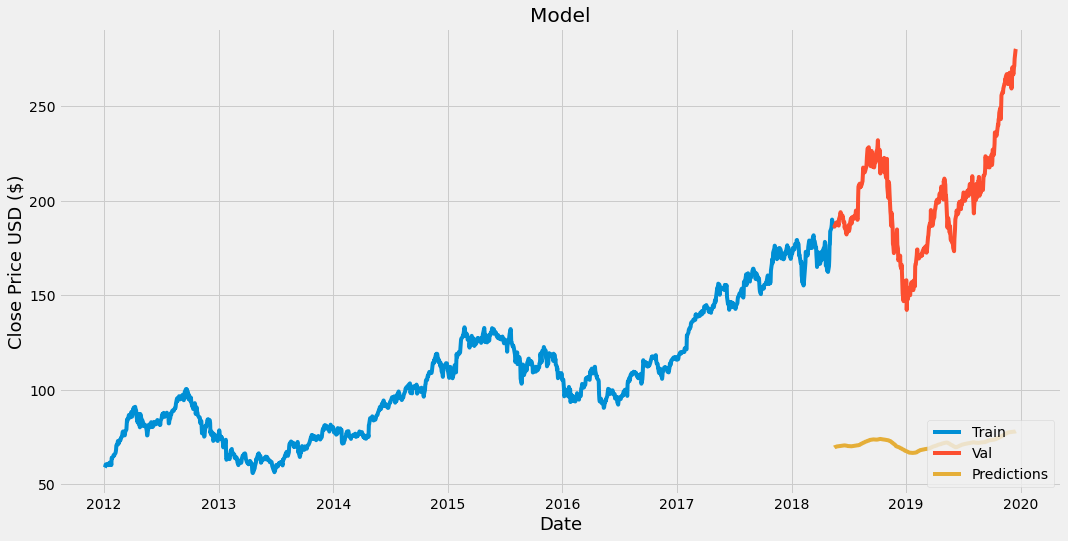

In [ ]:
# This part plots and visualizes the data

# Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualizes the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the actual prices and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,69.376816
2018-05-18,186.309998,69.497498
2018-05-21,187.630005,69.600113
2018-05-22,187.160004,69.689789
2018-05-23,188.360001,69.766403
...,...,...
2019-12-11,270.769989,77.685478
2019-12-12,271.459991,77.723526
2019-12-13,275.149994,77.769928


In [ ]:
# Tests the model
# Predict the closing price value of Apple Inc. for the dya of (12/18/2019)
# Steps
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Get the quote
# Convert the data to an array that has the closing price only 
# Get the last 60 day closing price and scale the data to be values between 0 and 1 inclusive
# Create an empty list
# Append the past 60 dat price to the empty list
# Convert the list to a numpy array
# Reshape the numpy array into a 3-dimensional dataset
# Input the data to the model
# Get the predicted price


# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append teh past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[78.011734]]


In [ ]:
# Looks for the actual price for the stock from a particular day

apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    279.73999
Name: Close, dtype: float64


#Cite the author 

####Arianne Ghislaine Rull is contributing to the project by helping to explain the source code in simple manner.

####This Colab notebook's source code is taken from the following links. All credits to the owner.

Medium Article -> https://medium.com/@randerson112358/stock-price-prediction-using-python-machine-learning-e82a039ac2bb
YouTube Video -> https://www.youtube.com/watch?v=QIUxPv5PJOY&feature=emb_title